In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
def ANN(datafile):
  x = datafile['MomN']
  Y = datafile['label']

  X = (np.array(x)).reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

  # Standardize the data
  # scaler = StandardScaler()
  # X_train_scaled = scaler.fit_transform(X_train)
  # X_test_scaled = scaler.transform(X_test)

  # Define ANN model
  model = Sequential([
      Dense(1024, activation='relu', input_dim=X_train.shape[1]),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(128, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),  # Additional layer
      Dense(16, activation='relu'),  # Additional layer
      Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Compute ROC curve
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  return tpr,fpr,roc_auc

In [ ]:
def DNN(datafile):
  x = datafile['MomN']
  Y = datafile['label']

  X = (np.array(x)).reshape(-1, 1)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

  model = Sequential([
      Dense(1024, activation='relu', input_dim=X_train.shape[1]),
      Dense(512, activation='relu'),
      Dense(256, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Compute ROC curve and ROC area
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  return tpr,fpr,roc_auc

In [ ]:
# datafile
Ar_genie = pd.read_csv('Ar_selection_genie.csv',sep="\t")
C_genie = pd.read_csv('C_selection_genie.csv',sep="\t")
Ar_nuwro = pd.read_csv('Ar_selection_nuwro.csv',sep="\t")
C_nuwro = pd.read_csv('C_selection_nuwro.csv',sep="\t")

In [ ]:
# ANN
t1,f1,a1 = ANN(Ar_genie)
t2,f2,a2 = ANN(C_genie)
t3,f3,a3 = ANN(Ar_nuwro)
t4,f4,a4 = ANN(C_nuwro)

# DNN
T1,F1,A1 = DNN(Ar_genie)
T2,F2,A2 = DNN(C_genie)
T3,F3,A3 = DNN(Ar_nuwro)
T4,F4,A4 = DNN(C_nuwro)

Epoch 1/10
594/594 [==============================] - 16s 23ms/step - loss: 0.1063 - accuracy: 0.9800 - val_loss: 0.0838 - val_accuracy: 0.9833
Epoch 2/10
594/594 [==============================] - 13s 22ms/step - loss: 0.0915 - accuracy: 0.9800 - val_loss: 0.0785 - val_accuracy: 0.9833
Epoch 3/10
594/594 [==============================] - 15s 25ms/step - loss: 0.0906 - accuracy: 0.9800 - val_loss: 0.0823 - val_accuracy: 0.9833
Epoch 4/10
594/594 [==============================] - 13s 22ms/step - loss: 0.0908 - accuracy: 0.9800 - val_loss: 0.0773 - val_accuracy: 0.9833
Epoch 5/10
594/594 [==============================] - 13s 23ms/step - loss: 0.0902 - accuracy: 0.9800 - val_loss: 0.0798 - val_accuracy: 0.9833
Epoch 6/10
594/594 [==============================] - 14s 23ms/step - loss: 0.0906 - accuracy: 0.9800 - val_loss: 0.0806 - val_accuracy: 0.9833
Epoch 7/10
594/594 [==============================] - 13s 22ms/step - loss: 0.0902 - accuracy: 0.9800 - val_loss: 0.0778 - val_accuracy:

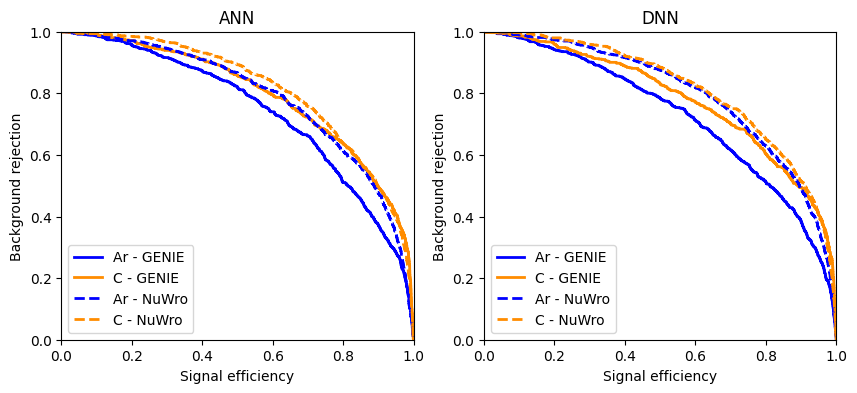

In [ ]:
# ROC curve
plt.figure(figsize=(10, 4))
lw = 2

plt.subplot(1, 2, 1)
plt.plot(t1, 1-f1, color='blue', lw=lw, label="Ar - GENIE")
plt.plot(t2, 1-f2, color='darkorange', lw=lw, label="C - GENIE")
plt.plot(t3, 1-f3, color='blue', lw=lw, label="Ar - NuWro",linestyle='--')
plt.plot(t4, 1-f4, color='darkorange', lw=lw, label="C - NuWro",linestyle='--')

plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.xlim(0,1.0)
plt.ylim(0.0,1.0)
plt.title('ANN')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(T1, 1-F1, color='blue', lw=lw, label="Ar - GENIE")
plt.plot(T2, 1-F2, color='darkorange', lw=lw, label="C - GENIE")
plt.plot(T3, 1-F3, color='blue', lw=lw, label="Ar - NuWro",linestyle='--')
plt.plot(T4, 1-F4, color='darkorange', lw=lw, label="C - NuWro",linestyle='--')

plt.xlabel("Signal efficiency")
plt.ylabel("Background rejection")
plt.xlim(0,1.0)
plt.ylim(0.0,1.0)
plt.title('DNN')
plt.legend()

plt.savefig('ROC.pdf', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
print(a1,a2,a3,a4,A1,A2,A3,A4)

0.7418857357965365 0.7958676874754613 0.7886291183027302 0.8132752783518845 0.7257498260585392 0.7805543872590252 0.797951154636888 0.8131475035637724
